<a href="https://colab.research.google.com/github/WhitneyMadafali/Water-Requirement-Prediction-for-Maize-using-KNN/blob/knn/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mydata.csv to mydata.csv


In [3]:
data = pd.read_csv('mydata.csv')
data

,temperature,humidity,ph,rainfall,Irrigation
0,22.613600,63.690706,5.749914,87.759539,0
1,26.100184,71.574769,6.931757,102.266244,0
2,23.558821,71.593514,6.657965,66.719955,0
3,19.972160,57.682729,6.596061,60.651715,0
4,18.478913,62.695039,5.970458,65.438354,0
...,...,...,...,...,...
495,22.107190,78.583201,6.364730,74.941366,0
496,23.038140,76.110215,6.913679,91.496975,1
497,24.547953,75.397527,7.766260,63.880799,0
498,23.738680,75.775038,7.556064,76.636692,0


In [4]:
x = data.drop(['Irrigation'], axis=1)
x.head()

,temperature,humidity,ph,rainfall
0,22.613600,63.690706,5.749914,87.759539
1,26.100184,71.574769,6.931757,102.266244
2,23.558821,71.593514,6.657965,66.719955
3,19.972160,57.682729,6.596061,60.651715
4,18.478913,62.695039,5.970458,65.438354


In [5]:
y = data['Irrigation']
y

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    1
497    0
498    0
499    1
Name: Irrigation, Length: 500, dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
x = scaler.fit_transform(x)

In [9]:
x

array([[0.4369329 , 0.63415831, 0.34915147, 0.47834963],
       [0.64610047, 0.74380552, 0.53294306, 0.60043532],
       [0.49363873, 0.7440662 , 0.49036493, 0.30128447],
       ...,
       [0.55297886, 0.79697032, 0.662719  , 0.27739067],
       [0.50442888, 0.80222054, 0.63003087, 0.38474185],
       [0.41924241, 0.91467981, 0.58840215, 0.28981805]])

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    1
497    0
498    0
499    1
Name: Irrigation, Length: 500, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [15]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [16]:
ypred = knn.predict(xtest)

In [17]:
ypred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [18]:
ytest

304    0
340    1
47     1
67     1
479    0
      ..
331    0
197    1
95     0
122    0
23     1
Name: Irrigation, Length: 150, dtype: int64

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[60 28]
 [41 21]]
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        88
           1       0.43      0.34      0.38        62

    accuracy                           0.54       150
   macro avg       0.51      0.51      0.51       150
weighted avg       0.53      0.54      0.53       150



In [21]:
error_rate = []
for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(xtrain,ytrain)
  pred_i = knn.predict(xtest)

  error_rate.append(np.mean(pred_i !=ytest))

Text(0, 0.5, 'Error rate')

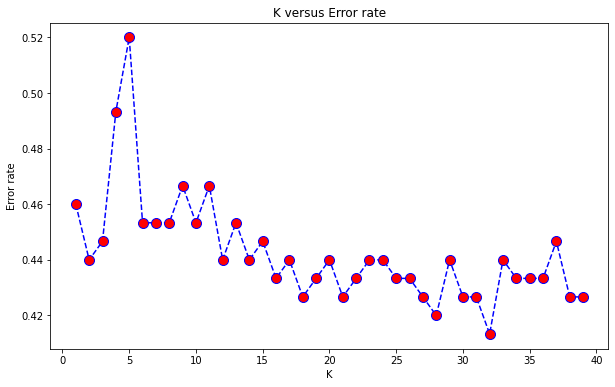

In [24]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

In [29]:
knn = KNeighborsClassifier(n_neighbors =13)
knn.fit(xtrain,ytrain)
predictions = knn.predict(xtest)

In [30]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[60 28]
 [41 21]]
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        88
           1       0.43      0.34      0.38        62

    accuracy                           0.54       150
   macro avg       0.51      0.51      0.51       150
weighted avg       0.53      0.54      0.53       150

